[[ 10  15  20]
 [ 20  25  25]
 [ 30  35  30]
 [ 40  45  35]
 [ 50  55  40]
 [ 60  65  45]
 [ 70  75  50]
 [ 80  85  55]
 [ 90  95  60]
 [100 105  65]]
3 3
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - loss: 4601.2939
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4428.1670
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4290.1123
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4164.0200
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4048.0847
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3939.5081
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00
Epoch 13/500
1/1 ━━━━━━━━

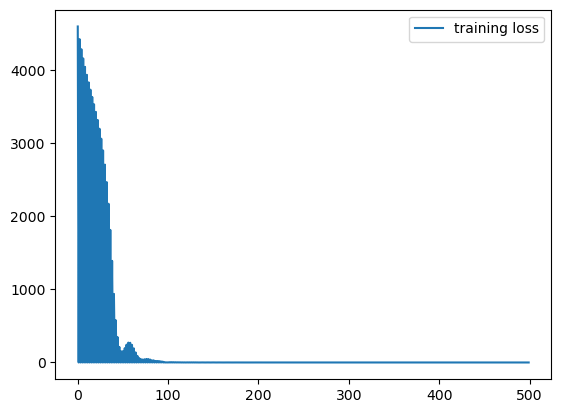

[[[ 80  85  55]
  [ 90  95  60]
  [100 105  65]]]
[[109.752785 115.09376   70.14056 ]]


In [65]:
# multivariate one step problem with lstm
from numpy import array
from numpy import hstack
# AI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import backend as keras_backend
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt

# define dataset
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105])
in_seq3 = array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65])

# reshape series
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))

sequence_list = [in_seq1, in_seq2, in_seq3]

# horizontally stack columns
dataset = hstack(tuple(sequence_list))

print(dataset)

# define generator
n_features = dataset.shape[1]

n_input = 3

print(n_features, n_input)

generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=12)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

# fit model
EPOCHS = 500

fit_res = model.fit(generator, steps_per_epoch=1, epochs=EPOCHS ,verbose=1)

plt.plot(fit_res.history['loss'], label='training loss')
plt.legend()
plt.show()

# make a one step prediction out of sample
x_input = array([[80, 85, 55], [90, 95, 60], [100, 105, 65]]).reshape((1, 3, 3))
print(x_input)

yhat = model.predict(x_input, verbose=0)

print(yhat)